# Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import builtins
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

# Data Load, Normalization, Outliers


## Data Load


In [3]:
# Read the dataset from the specified path into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/CE889_Neural_Network_Data/DateForRocketGame/Dataset.csv')

# Rename the columns to more descriptive names for better understanding
df.columns = ['x_axis', 'y_axis', 'x_vector', 'y_vector']

# Drop rows with missing values to ensure the dataset is clean
df.dropna(inplace=True)

# Display the cleaned DataFrame
df

,x_axis,y_axis,x_vector,y_vector
0,264.240535,382.300000,0.000122,0.006980
1,264.233555,382.299878,-0.099391,-0.019069
2,264.252624,382.399269,-0.198295,0.041837
3,264.210787,382.597564,-0.296349,0.029672
4,264.181115,382.893913,-0.393311,0.024401
...,...,...,...,...
733577,17.706959,95.535851,6.645523,-0.022513
733578,17.729472,88.890329,6.745523,0.017487
733579,17.711986,82.144806,6.845523,-0.022513
733580,17.734499,75.299283,6.945523,0.017487


## Plotting Data

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme for Seaborn plots
sns.set_theme(style="ticks")

import seaborn as sns
import matplotlib.pyplot as plt

def plotData(data_frame):
    # Reduce the data size by taking a subset or downsampling
    data_subset = data_frame.iloc[::10]  # Take every 10th data point

    # Initialize Seaborn style
    sns.set(style="whitegrid")

    # Create a grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # Adjust the size as needed

    # Loop through each column in the subset and plot on subplots
    columns = data_subset.columns  # Assuming there are exactly 4 columns

    for i, ax in enumerate(axs.flat):
        sns.lineplot(
            data=data_subset,
            x=data_subset.index,  # Assuming the index represents epochs
            y=columns[i],
            ax=ax,
            color="green",
            marker="o",
            linewidth=2,
        )
        ax.set_title(f"{columns[i]} vs Epochs", fontsize=14, fontweight="bold")
        ax.set_xlabel("Epochs", fontsize=12)
        ax.set_ylabel(columns[i], fontsize=12)

    # Adjust the layout for a clean appearance
    plt.tight_layout()

    # Show the plots
    plt.show()


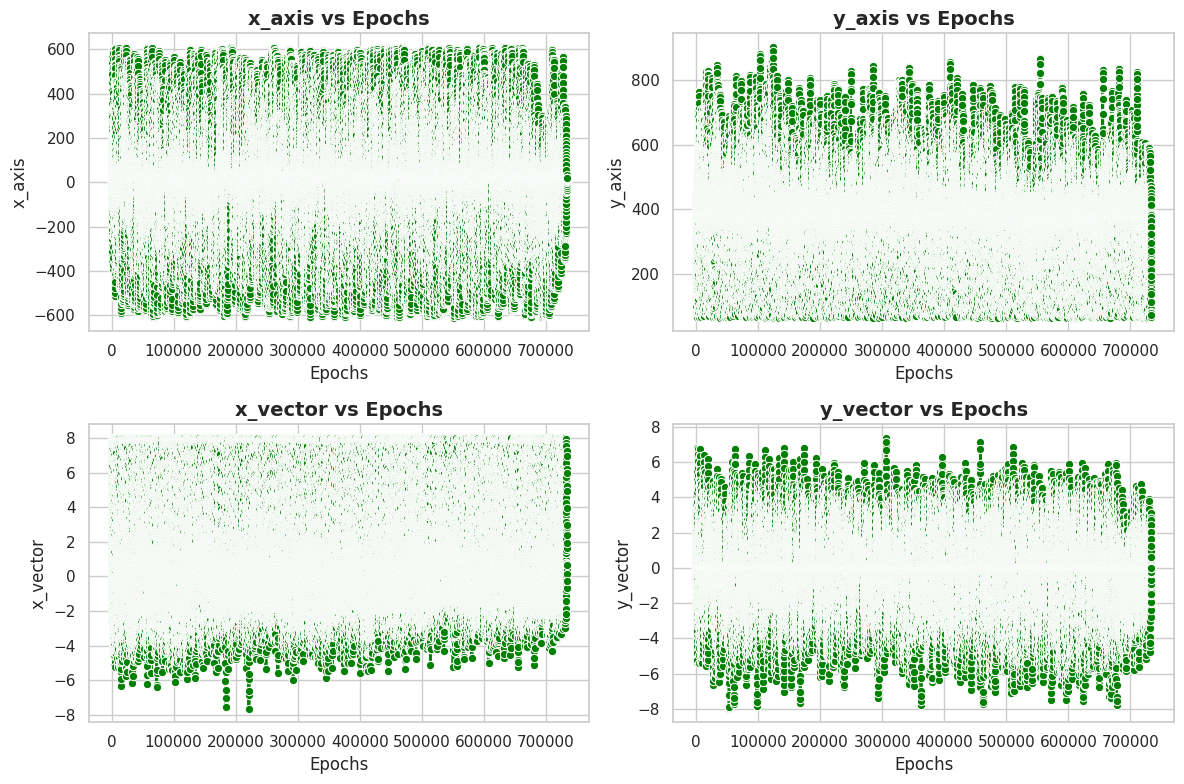

In [5]:
plotData(df)

## Outliers

In [6]:
# Filter the DataFrame to exclude rows where:
df = df[(df['y_axis'] <= 750) & (df['x_vector'] > -5) & (df['y_vector'] > -5) & (df['y_vector'] < 5)]

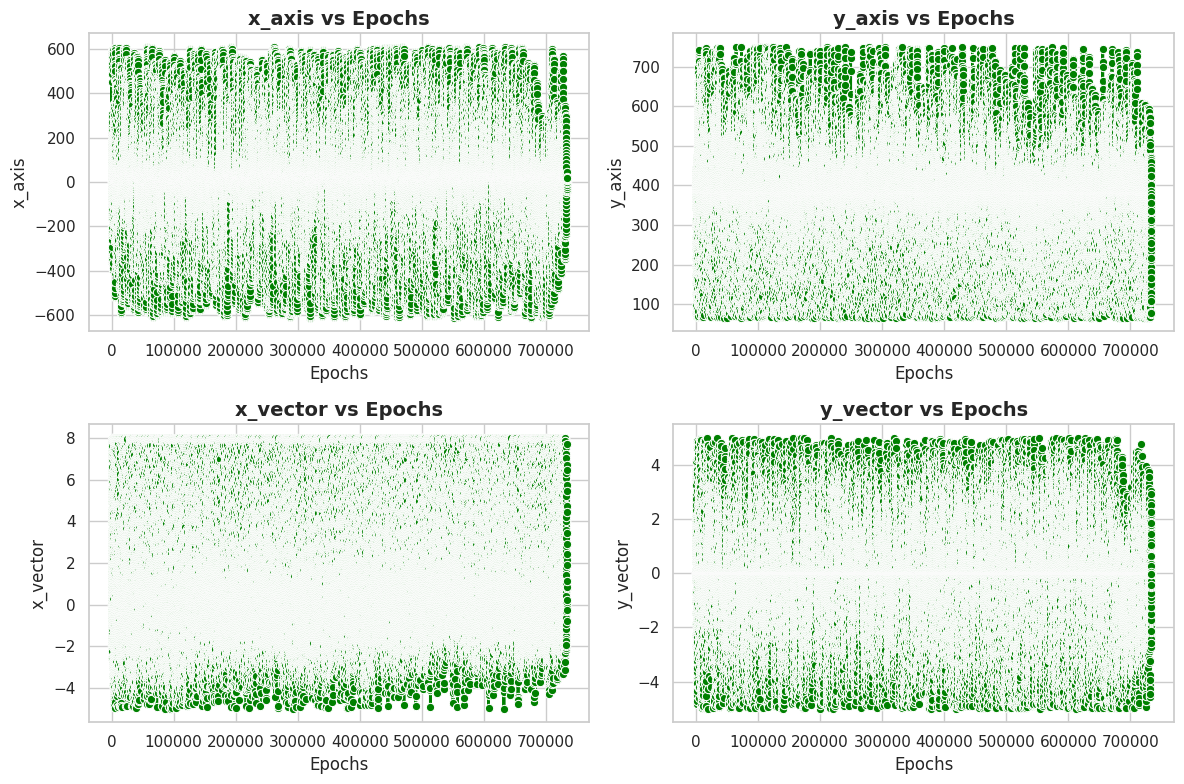

In [7]:
plotData(df)

## Normalization

In [8]:
# Get the minimum value for each column in the DataFrame
min = df.min()

# Get the maximum value for each column in the DataFrame
max = df.max()

# Print the minimum values for each column
print(min)

# Print the maximum values for each column
print(max)

x_axis     -611.633297
y_axis       65.904359
x_vector     -4.999663
y_vector     -4.999939
dtype: float64
x_axis      610.366748
y_axis      749.980887
x_vector      8.000000
y_vector      4.999938
dtype: float64


In [9]:
# Normalize the DataFrame by scaling the values in each column
# Formula: (value - min) / (max - min)
normalized_df = (df - min) / (max - min)

# Save the normalized DataFrame to a new CSV file without including the index
normalized_df.to_csv('/content/drive/MyDrive/CE889_Neural_Network_Data/DateForRocketGame/Normalize.csv', index=False)

In [10]:
# Drop any rows with missing values (NaN) from the normalized DataFrame
normalized_df.dropna(inplace=True)

# Display the DataFrame after removing rows with missing values
normalized_df

,x_axis,y_axis,x_vector,y_vector
0,0.716754,0.462515,0.384609,0.500698
1,0.716749,0.462515,0.376954,0.498093
2,0.716764,0.462660,0.369346,0.504184
3,0.716730,0.462950,0.361803,0.502967
4,0.716706,0.463383,0.354344,0.502440
...,...,...,...,...
733577,0.515008,0.043316,0.895807,0.497749
733578,0.515027,0.033601,0.903499,0.501749
733579,0.515012,0.023741,0.911192,0.497749
733580,0.515031,0.013734,0.918884,0.501749


# Split Train Test

In [11]:
# Split the data into 70% training and 30% testing
train_data, test_data = train_test_split(normalized_df, test_size=0.3, random_state=42)

# Save the testing data to the specified location
test_data.to_csv('/content/drive/MyDrive/CE889_Neural_Network_Data/DateForRocketGame/NormaliseDataforTest.csv', index=False)

In [12]:
train_data

,x_axis,y_axis,x_vector,y_vector
524264,0.518428,0.277180,0.826945,0.499998
90744,0.704845,0.622892,0.104930,0.788995
343689,0.193689,0.521708,0.181577,0.067570
74211,0.579197,0.555565,0.539269,0.812293
646158,0.518078,0.155835,0.703892,0.493045
...,...,...,...,...
266640,0.344589,0.351645,0.368477,0.097058
375434,0.063531,0.471786,0.258229,0.348424
137179,0.295946,0.377725,0.488224,0.385057
689142,0.524565,0.305098,0.762962,0.501150


# Declaring input layer, output layer, weights

In [13]:
input_layer = train_data.iloc[:, :2].values.tolist()
output_layer = train_data.iloc[:, 2:].values.tolist()

In [14]:
weights_input_hidden = [
    [0.13, 0.37],  # Weights for the first hidden neuron
    [0.24, 0.14],  # Weights for the second hidden neuron
    [0.32, 1.6],   # Weights for the third hidden neuron
    [0.28, 0.26]   # Weights for the forth hidden neuron
]

# Weights from hidden layer to output layer (3 hidden neurons -> 2 outputs)
weights_hidden_output = [
    [0.74, 1.83, 0.42, 0.34],  # Weights for the first output neuron
    [1.0, 1.72, 0.53, 0.24]   # Weights for the second output neuron
]

weights_input_hidden_prev = [[0 for _ in row] for row in weights_input_hidden]
weights_hidden_output_prev = [[0 for _ in row] for row in weights_hidden_output]
gradient_list = [[0] * len(weights_input_hidden)] + [[0, 0]]

learning_rate = 0.1
M =  0.1  # Momentum term.
epsilon = 1e-6  # Small value to avoid numerical instability

# Feed Forward

In [15]:
def sigmoidCalc(v):
    lambdaVal = 0.9
    if v > 100:  # Prevent overflow
        return 1.0
    elif v < -100:  # Prevent underflow
        return 0.0
    return 1 / (1 + math.exp(-lambdaVal * v))

In [16]:
def layerValCalc(input_layer, weights):
    # Initialize an empty list to store the calculated values for each neuron in the layer
    layer = []

    # Iterate through each neuron in the layer (corresponding to each row in weights)
    for i in range(len(weights)):
        # Initialize the sum for the current neuron's weighted sum (layer_val)
        layer_val = 0

        # Iterate through each input value (for each input to the neuron)
        for j in range(len(weights[i])):
            # Multiply the input value by the corresponding weight and add it to the current layer value
            layer_val += input_layer[j] * weights[i][j]

        # Append the calculated value for this neuron to the layer list
        layer.append(layer_val)

    # Return the list of calculated values (output of the layer)
    return layer

In [17]:
def feed_forward(input_layer_val):
    # Initialize an empty list to store the outputs of each layer
    outputs = []

    # Initialize variable v to store the output values from each layer
    v = 0

    # Iterate through the two layers: 1 hidden layer and 1 output layer
    for i in range(2):
        if i == 0:
            # Calculate the values for the hidden layer (using input to hidden weights)
            v = layerValCalc(input_layer_val, weights_input_hidden)
        else:
            # Calculate the values for the output layer (using hidden to output weights)
            v = layerValCalc(input_layer_val, weights_hidden_output)

        # If it's not the output layer, apply the sigmoid activation function (for the hidden layer)
        if i != 1:
            # For the hidden layer, apply the sigmoid activation function to each value in v
            hidden_outputs = [sigmoidCalc(val) for val in v]
        else:
            # For the output layer, no activation function is applied (this can be changed as needed)
            hidden_outputs = v

        # Set the output of the current layer as the input for the next layer
        input_layer_val = hidden_outputs

        # Append the current layer's output to the outputs list
        outputs.append(hidden_outputs)

    # Return the outputs of all layers (hidden and output)
    return outputs

# Back Propagation

In [18]:
# Initialize an empty list to store RMSE values
rmse_values = []

for it in range(250):

    # Accumulators for squared errors
    sum_squared_error_y1 = 0
    sum_squared_error_y2 = 0

    # Shuffle the list
    # random.shuffle(input_layer)

    for indx in range(len(input_layer)):
        outputs = feed_forward(input_layer[indx])

        # Calculate errors for the output layer
        errors = [output_layer[indx][i] - outputs[-1][i] for i in range(len(output_layer[indx]))]

        # Accumulate squared errors for RMSE calculation
        sum_squared_error_y1 += errors[0] ** 2
        sum_squared_error_y2 += errors[1] ** 2

        # Update output layer gradients
        for i in range(len(errors)):
            temp_outputs = np.array(outputs[-1])  # Convert to numpy array if needed
            output = builtins.max(builtins.min(temp_outputs[i], 1 - epsilon), epsilon)   # Clip output values

            gradient_list[-1][i] = learning_rate * errors[i] * output * (1 - output)

        # Update weights from hidden to output
        for i in range(len(weights_hidden_output)):
            for j in range(len(weights_hidden_output[i])):
                value = (
                    learning_rate * gradient_list[-1][i] * outputs[0][j]
                    + M * weights_hidden_output_prev[i][j]
                )
                weights_hidden_output_prev[i][j] = value
                weights_hidden_output[i][j] += value

        # Update hidden layer gradients
        for i in range(len(gradient_list[0])):
            gradient_list[0][i] = learning_rate * outputs[0][i] * (1 - outputs[0][i]) * sum(
                gradient_list[-1][j] * weights_hidden_output[j][i] for j in range(len(gradient_list[-1]))
            )

        # Update weights from input to hidden
        for i in range(len(weights_input_hidden)):
            for j in range(len(weights_input_hidden[i])):
                value = (
                    learning_rate * gradient_list[0][i] * input_layer[indx][j]
                    + M * weights_input_hidden_prev[i][j]
                )
                weights_input_hidden_prev[i][j] = value
                weights_input_hidden[i][j] += value

    # Calculate RMSE for each output
    rmse_y1 = math.sqrt(sum_squared_error_y1 / len(input_layer))
    rmse_y2 = math.sqrt(sum_squared_error_y2 / len(input_layer))

    # Average RMSE across both outputs
    rmse = (rmse_y1 + rmse_y2) / 2
    # Store RMSE for plotting
    rmse_values.append(rmse)

    print(f"Iteration: {it + 1}, RMSE: {rmse:.6f}")

Iteration: 1, RMSE: 1.448406
Iteration: 2, RMSE: 1.437284
Iteration: 3, RMSE: 1.426254
Iteration: 4, RMSE: 1.415315
Iteration: 5, RMSE: 1.404465
Iteration: 6, RMSE: 1.393704
Iteration: 7, RMSE: 1.383031
Iteration: 8, RMSE: 1.372446
Iteration: 9, RMSE: 1.361947
Iteration: 10, RMSE: 1.351534
Iteration: 11, RMSE: 1.341207
Iteration: 12, RMSE: 1.330964
Iteration: 13, RMSE: 1.320805
Iteration: 14, RMSE: 1.310729
Iteration: 15, RMSE: 1.300736
Iteration: 16, RMSE: 1.290825
Iteration: 17, RMSE: 1.280994
Iteration: 18, RMSE: 1.271244
Iteration: 19, RMSE: 1.261574
Iteration: 20, RMSE: 1.251983
Iteration: 21, RMSE: 1.242470
Iteration: 22, RMSE: 1.233036
Iteration: 23, RMSE: 1.223678
Iteration: 24, RMSE: 1.214397
Iteration: 25, RMSE: 1.205192
Iteration: 26, RMSE: 1.196062
Iteration: 27, RMSE: 1.187007
Iteration: 28, RMSE: 1.178025
Iteration: 29, RMSE: 1.169118
Iteration: 30, RMSE: 1.160283
Iteration: 31, RMSE: 1.151521
Iteration: 32, RMSE: 1.142830
Iteration: 33, RMSE: 1.134210
Iteration: 34, RMSE

# RMSE

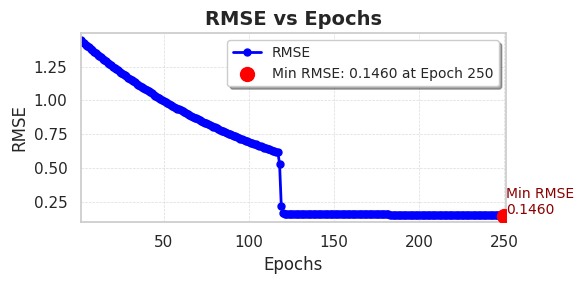

In [19]:
# Detect the minimum RMSE and its corresponding epoch
min_rmse = builtins.min(rmse_values)
min_epoch = rmse_values.index(min_rmse) + 1  # Adding 1 for 1-based indexing

# Plot RMSE vs Epochs
plt.figure(figsize=(6, 3))  # Medium-sized graph
plt.plot(range(1, len(rmse_values) + 1), rmse_values,
         label="RMSE", color="blue", linewidth=2, marker="o", markersize=5)

# Highlight the minimum RMSE point
plt.scatter(min_epoch, min_rmse, color="red", s=100, zorder=5, label=f"Min RMSE: {min_rmse:.4f} at Epoch {min_epoch}")

# Add annotations for the minimum RMSE point
plt.annotate(f"Min RMSE\n{min_rmse:.4f}",
             xy=(min_epoch, min_rmse), xycoords='data',
             xytext=(min_epoch + 1, min_rmse + 0.01), textcoords='data',
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, color="darkred")

# Add gridlines, titles, and labels
plt.title("RMSE vs Epochs", fontsize=14, fontweight="bold")
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add a legend and customize its style
plt.legend(loc="upper right", fontsize=10, frameon=True, shadow=True)

# Adjust axis limits for better spacing
plt.xlim(1, len(rmse_values) + 1)
plt.ylim(builtins.min(rmse_values) - 0.05, builtins.max(rmse_values) + 0.05)

# Show the graph
plt.tight_layout()
plt.show()


# Getting the weights

In [20]:
print(weights_input_hidden)

[[-0.4975087791239208, 1.2016780567776557], [3.9012450597204755, 0.6675107395150763], [0.6128513501539625, 3.065091952905957], [-3.5016733284519157, 2.1910637285793113]]


In [21]:
print(weights_hidden_output)

[[1.8734472738086914, 3.3091160965286397, -4.627440859589065, 0.9073650328374685], [11.29275677095681, -2.9655732162924595, -2.0587018840082156, -4.757812016009509]]
